# Data Preparation and Image Exploration
The data preparation process begins with extracting the zipped dataset from a local directory. The dataset is downloaded manually to streamline the data collection process, as the scripts are executed locally and automation through GitHub Actions is not feasible due to the repository's dataset directory exclusion. Once extracted, the dataset is organized into a structured directory to support the modeling workflow effectively. Additionally, metadata for the dataset is generated in a CSV file format to facilitate analysis. During data exploration, the image data types, dataset labels, label distribution, and average image dimensions are examined. Sample images for each label are also reviewed to gain a deeper understanding of the dataset's characteristics.

### Import the necessary package

In [3]:
# handling the file and directory
import os
import shutil
# handling the zip file
import zipfile
# help to get the random value
import random
# handling the metadata
import pandas as pd
# visualizing the data
import matplotlib.pyplot as plt
from PIL import Image

### Set the path variables

In [45]:
zipped_dataset_path = "./dataset/trashnet/dataset-original.zip"
temp_dataset_path = "./dataset/temp_dataset"
destination_path = "./dataset/prepared_dataset"

### Extract the zipped file

In [5]:
with zipfile.ZipFile(zipped_dataset_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dataset_path)

### Get the existing labels
getting the labels directly from the dataset. Labels not hardcoded on the script (in case the labels is changing in future)

In [6]:
labels = os.listdir(os.path.join(temp_dataset_path, "dataset-original"))

### Get the image path
Getting all image path from each labels. The information is stored in a dictionary to make it easy on transforming it as a dataframe later

In [7]:
dataset_info_dict = {}
for label in labels:
    if label != ".DS_Store":    # exclude the .DS_Store file from the labels list
        dataset_info_dict[label] = os.listdir(os.path.join(temp_dataset_path, "dataset-original", label))

### Create metadata
create the metadata from the dataset that store label, file name, file path, and file type. the metadata is make to make the exploration easier

In [8]:
# initiate the dataframe
dataset_info_df = pd.DataFrame(columns=["label", "file_name", "file_path", "file_type"])
# populate the dataframe with the dataset information from the dictionary
for label in dataset_info_dict:
    for file_name in dataset_info_dict[label]:
        # add a row to the dataframe
        dataset_info_df.loc[len(dataset_info_df)] = [label,
                                                    file_name,
                                                    os.path.join(temp_dataset_path, "dataset-original", label, file_name),
                                                    file_name.split(".")[-1]]
# remove the .DS_Store file from the dataframe
dataset_info_df.drop(dataset_info_df.loc[dataset_info_df.file_type == "DS_Store"].index, inplace=True)
# show a sample of the dataframe
dataset_info_df.head(3)

,label,file_name,file_path,file_type
1,cardboard,cardboard1.jpg,./dataset/temp_dataset\dataset-original\cardbo...,jpg
2,cardboard,cardboard10.jpg,./dataset/temp_dataset\dataset-original\cardbo...,jpg
3,cardboard,cardboard100.jpg,./dataset/temp_dataset\dataset-original\cardbo...,jpg


### Understanding the dataset
Getting the information of the dataset and the distribution of each label

get the information of the file type is stored on the dataset

In [9]:
print("dataset shape:", dataset_info_df.shape,
      "\ncount file_type values:", dataset_info_df.file_type.value_counts(),
      sep="\n")

dataset shape:
(2527, 4)

count file_type values:
file_type
jpg    2527
Name: count, dtype: int64


Obtaining information on the distribution of each label in the dataset reveals a generally balanced spread, except for the "trash" label, which is more broadly defined and less specific.

In [10]:
print("labels distribution:")
# get the labels distribution from the metadata
label_distribution_info = pd.DataFrame(dataset_info_df.label.value_counts()).reset_index().rename(columns={"count":"count_img"})
# add the percentage of the labels distribution
label_distribution_info["percentage"] = round(label_distribution_info.count_img
                                            / label_distribution_info.count_img.sum()
                                            * 100, 2)
# show the labels distribution
label_distribution_info

labels distribution:


,label,count_img,percentage
0,paper,594,23.51
1,glass,501,19.83
2,plastic,482,19.07
3,metal,410,16.22
4,cardboard,403,15.95
5,trash,137,5.42


Retrieve detailed information on each label's average image dimensions, image mode, and format. The images consistently have a resolution of 4032x3024 pixels, are in RGB mode, and are saved in JPG format.

In [41]:
for label in labels:
        if label != ".DS_Store":
                # choose a random image from the dataset for each label
                img_sample = Image.open(random.choice(list(dataset_info_df.loc[dataset_info_df.label == label].file_path)))
                backless = "\\"
                print(f"label: {label}",
                        f"file name: {img_sample.filename.split(backless)[-1]}",
                        f"image size: {img_sample.size}",
                        f"image mode: {img_sample.mode}",
                        f"image format: {img_sample.format}",
                        sep="\n", end="\n\n")

label: cardboard
file name: cardboard52.jpg
image size: (4032, 3024)
image mode: RGB
image format: JPEG

label: glass
file name: glass106.jpg
image size: (4032, 3024)
image mode: RGB
image format: JPEG

label: metal
file name: metal407.jpg
image size: (4032, 3024)
image mode: RGB
image format: JPEG

label: paper
file name: paper435.jpg
image size: (4032, 3024)
image mode: RGB
image format: JPEG

label: plastic
file name: plastic67.jpg
image size: (4032, 3024)
image mode: RGB
image format: JPEG

label: trash
file name: trash16.jpg
image size: (4032, 3024)
image mode: RGB
image format: JPEG



In [17]:
dataset_info_df.head(2)

,label,file_name,file_path,file_type
1,cardboard,cardboard1.jpg,./dataset/temp_dataset\dataset-original\cardbo...,jpg
2,cardboard,cardboard10.jpg,./dataset/temp_dataset\dataset-original\cardbo...,jpg


### Show a sample image
Show the sample image from each labels to understand more about the dataset characteristics

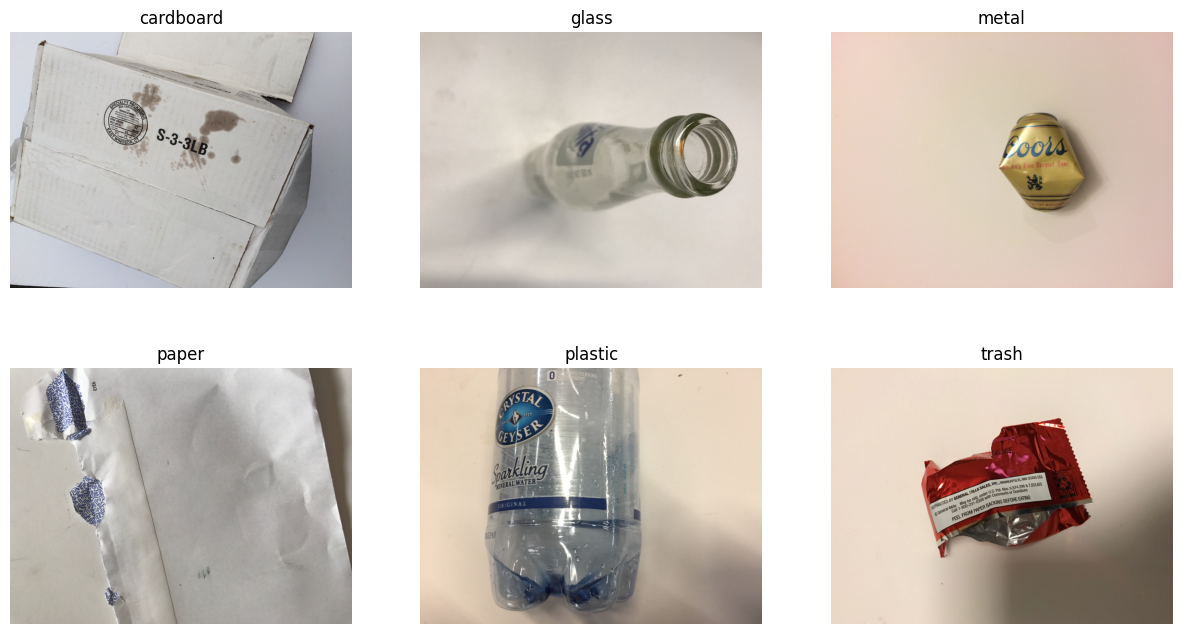

In [44]:
plt.figure(figsize=(15, 8))
index = 0
for label in labels:
    if label != ".DS_Store":
        index += 1
        img_sample = Image.open(random.choice(list(dataset_info_df.loc[dataset_info_df.label == label, "file_path"])))
        plt.subplot(2, 3, index)
        plt.imshow(img_sample)
        plt.title(label)
        plt.axis("off")
plt.show()

### Save the metadata
save the metadata in form of csv file

In [47]:
dataset_info_df.to_csv(os.path.join("./dataset", "dataset_info.csv"), index=False)

### Save the dataset
Store the dataset in a new structured directory that campatible for the next steps

In [46]:
# create the directory structure for the prepared dataset
for label in labels[1:]:
    os.makedirs(os.path.join(destination_path, label), exist_ok=True)

In [48]:
# copy the images to the prepared dataset directory
for index, row in dataset_info_df.iterrows():
    shutil.copy2(row.file_path, os.path.join(destination_path, row.label, row.file_name))